In [2]:
import sys
sys.path.append('../scripts/')
from mcl import *


In [4]:
class OcclusionFreeParticle(Particle):
    def observation_update(self, observation, envmap, distance_dev_rate, direction_dev):
        for d in observation:
            obs_pos = d[0]
            obs_id = d[1]
            
            pos_on_map = envmap.landmarks[obs_id].pos
            particle_suggest_pos = IdealCamera.observation_function(self.pose, pos_on_map)
            
            distance_dev = distance_dev_rate * particle_suggest_pos[0]
            cov = np.diag(np.array([distance_dev ** 2, direction_dev ** 2]))
            if obs_pos[0] > particle_suggest_pos[0]:
                obs_pos[0] = particle_suggest_pos[0]
                
            self.weight *= multivariate_normal(mean = particle_suggest_pos, cov = cov).pdf(obs_pos)

<IPython.core.display.Javascript object>


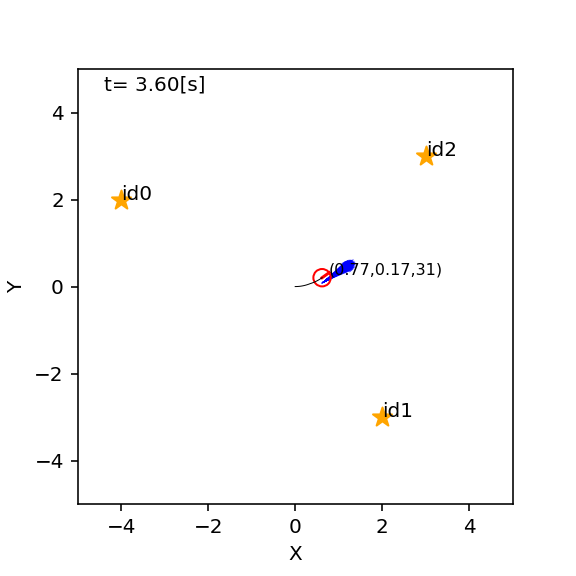

In [10]:
def trial(animation): ###mclkidnap1test
    time_interval = 0.1
    world = World(30, time_interval, debug=not animation) 

    ## 地図を生成して3つランドマークを追加 ##
    m = Map()
    m.append_landmark(Landmark(-4,2))
    m.append_landmark(Landmark(2,-3))
    m.append_landmark(Landmark(3,3))
    world.append(m)

    ## ロボットを作る ##
    init_pose = np.array([0,0,0]).T
    # robot_pose = np.array([np.random.uniform(-5.0, 5.0), np.random.uniform(-5.0, 5.0), np.random.uniform(-math.pi, math.pi)]).T
    pf = Mcl(m, init_pose, 100)
    pf.particles = [OcclusionFreeParticle(init_pose, 1.0 / 100) for i in range(1000)]
    a = EstimationAgent(time_interval, 0.2, 10.0/180*math.pi, pf)
    r = Robot(init_pose, sensor=Camera(m, occlusion_prob = 0.5), agent=a, color="red")
    world.append(r)

    world.draw()
   
trial(True)
#    return (r.pose, pf.ml.pose)

In [9]:
#trial(True)